In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# After mounting, your file will be in /content/drive/MyDrive/
file_path = "/content/drive/MyDrive/final_cleaned_dataset.csv"

import pandas as pd
cleaned_df = pd.read_csv(file_path)


Mounted at /content/drive


In [3]:
file_path = "/content/drive/MyDrive/final_cleaned_dataset.csv"


In [4]:
cleaned_df = pd.read_csv(file_path)

In [5]:
X = cleaned_df.drop(columns=["participant"])
participants = cleaned_df["participant"]


In [6]:
import numpy as np
import pandas as pd

# Check for infinite values
print(np.isinf(X).sum())

# Check for NaNs
print(np.isnan(X).sum())

# Check for extremely large values
print(np.max(X))


EEG_Delta_TP9                1
EEG_Delta_AF7                1
EEG_Delta_AF8                0
EEG_Delta_TP10               2
EEG_Theta_TP9                1
                            ..
TIVA_BlinkRate               0
TIVA_Pitch                   0
TIVA_Yaw                     0
TIVA_Roll                    0
TIVA_Interocular Distance    0
Length: 136, dtype: int64
EEG_Delta_TP9                0
EEG_Delta_AF7                0
EEG_Delta_AF8                0
EEG_Delta_TP10               0
EEG_Theta_TP9                0
                            ..
TIVA_BlinkRate               0
TIVA_Pitch                   0
TIVA_Yaw                     0
TIVA_Roll                    0
TIVA_Interocular Distance    0
Length: 136, dtype: int64
1680003517175.7195


In [7]:
X = X.replace([np.inf, -np.inf], np.nan)  # replace infinities with NaN
X = X.fillna(X.mean())  # fill NaNs with column mean


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [11]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)


In [12]:
clustered_df = cleaned_df.copy()
clustered_df["Cluster"] = clusters


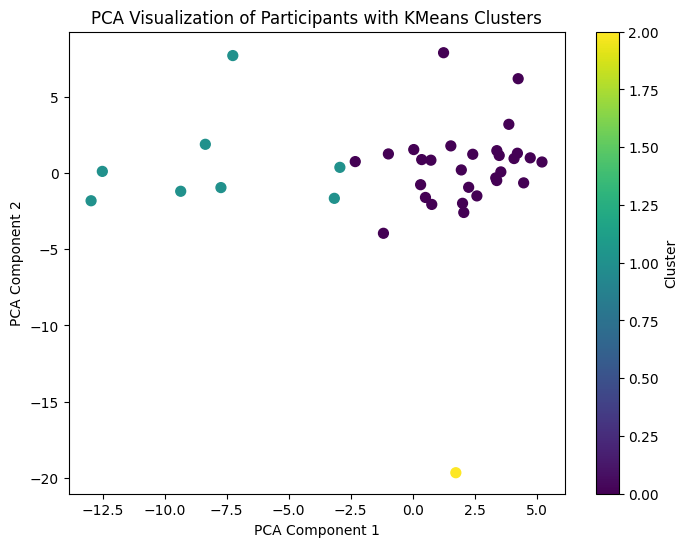

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap="viridis", s=50)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Visualization of Participants with KMeans Clusters")
plt.colorbar(label="Cluster")
plt.show()

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
output_path = "/content/drive/MyDrive/final_clustered_dataset.csv"
clustered_df.to_csv(output_path, index=False)

print(f"Clustered dataset saved at: {output_path}")


Clustered dataset saved at: /content/drive/MyDrive/final_clustered_dataset.csv


In [16]:
print(clustered_df.head())

   participant  EEG_Delta_TP9  EEG_Delta_AF7  EEG_Delta_AF8  EEG_Delta_TP10  \
0            1       0.833664       0.574739       0.789598        1.086531   
1           10       0.000000       0.000000       0.000000        0.000000   
2           11       0.693921       0.332859       0.344441        0.692827   
3           12       0.822461       1.244754       1.068832        0.707829   
4           13       0.823991       0.360686       0.390088        0.884428   

   EEG_Theta_TP9  EEG_Theta_AF7  EEG_Theta_AF8  EEG_Theta_TP10  EEG_Alpha_TP9  \
0       0.703385       0.206121       0.397564        0.850763       0.989821   
1       0.000000       0.000000       0.000000        0.000000       0.000000   
2       0.640457       0.151338       0.149008        0.614750       0.842703   
3       0.476995       0.880825       0.780527        0.456547       0.508288   
4       0.550458       0.161854       0.168920        0.596688       0.707664   

   ...  TIVA_Smile  TIVA_Smirk  TIVA_U

In [17]:
cluster_summary = clustered_df.groupby("Cluster").mean()
print(cluster_summary)


         participant  EEG_Delta_TP9  EEG_Delta_AF7  EEG_Delta_AF8  \
Cluster                                                             
0          18.965517       0.756313           -inf       0.702914   
1          22.625000           -inf       0.441352       0.444668   
2          10.000000       0.000000       0.000000       0.000000   

         EEG_Delta_TP10  EEG_Theta_TP9  EEG_Theta_AF7  EEG_Theta_AF8  \
Cluster                                                                
0                  -inf       0.555879           -inf       0.383826   
1                  -inf           -inf       0.164161       0.073162   
2                   0.0       0.000000       0.000000       0.000000   

         EEG_Theta_TP10  EEG_Alpha_TP9  ...  TIVA_Nose Wrinkle  TIVA_Smile  \
Cluster                                 ...                                  
0                  -inf       0.770227  ...           0.280383    0.628543   
1                  -inf           -inf  ...           1.155

In [18]:
clustered_df["PCA1"] = X_pca[:,0]
clustered_df["PCA2"] = X_pca[:,1]


In [19]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", score)


Silhouette Score: 0.1915597566979627


In [20]:
print(clustered_df["Cluster"].value_counts())


Cluster
0    29
1     8
2     1
Name: count, dtype: int64


In [21]:
cluster_summary = clustered_df.groupby("Cluster").mean()
print(cluster_summary)


         participant  EEG_Delta_TP9  EEG_Delta_AF7  EEG_Delta_AF8  \
Cluster                                                             
0          18.965517       0.756313           -inf       0.702914   
1          22.625000           -inf       0.441352       0.444668   
2          10.000000       0.000000       0.000000       0.000000   

         EEG_Delta_TP10  EEG_Theta_TP9  EEG_Theta_AF7  EEG_Theta_AF8  \
Cluster                                                                
0                  -inf       0.555879           -inf       0.383826   
1                  -inf           -inf       0.164161       0.073162   
2                   0.0       0.000000       0.000000       0.000000   

         EEG_Theta_TP10  EEG_Alpha_TP9  ...  TIVA_Smirk  TIVA_Upper Lip Raise  \
Cluster                                 ...                                     
0                  -inf       0.770227  ...    0.906255              0.404538   
1                  -inf           -inf  ...    1.3

In [22]:
cluster_summary = clustered_df.groupby("Cluster").mean()
print(cluster_summary)

         participant  EEG_Delta_TP9  EEG_Delta_AF7  EEG_Delta_AF8  \
Cluster                                                             
0          18.965517       0.756313           -inf       0.702914   
1          22.625000           -inf       0.441352       0.444668   
2          10.000000       0.000000       0.000000       0.000000   

         EEG_Delta_TP10  EEG_Theta_TP9  EEG_Theta_AF7  EEG_Theta_AF8  \
Cluster                                                                
0                  -inf       0.555879           -inf       0.383826   
1                  -inf           -inf       0.164161       0.073162   
2                   0.0       0.000000       0.000000       0.000000   

         EEG_Theta_TP10  EEG_Alpha_TP9  ...  TIVA_Smirk  TIVA_Upper Lip Raise  \
Cluster                                 ...                                     
0                  -inf       0.770227  ...    0.906255              0.404538   
1                  -inf           -inf  ...    1.3

In [23]:
from sklearn.cluster import KMeans


In [24]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)


In [25]:
clustered_df["Cluster"] = clusters


In [26]:
print("Cluster counts:")
print(clustered_df["Cluster"].value_counts())


Cluster counts:
Cluster
0    29
1     8
2     1
Name: count, dtype: int64


In [27]:
cluster_summary = clustered_df.groupby("Cluster").mean()
print("\nCluster summary (mean values per cluster):")
print(cluster_summary.head())


Cluster summary (mean values per cluster):
         participant  EEG_Delta_TP9  EEG_Delta_AF7  EEG_Delta_AF8  \
Cluster                                                             
0          18.965517       0.756313           -inf       0.702914   
1          22.625000           -inf       0.441352       0.444668   
2          10.000000       0.000000       0.000000       0.000000   

         EEG_Delta_TP10  EEG_Theta_TP9  EEG_Theta_AF7  EEG_Theta_AF8  \
Cluster                                                                
0                  -inf       0.555879           -inf       0.383826   
1                  -inf           -inf       0.164161       0.073162   
2                   0.0       0.000000       0.000000       0.000000   

         EEG_Theta_TP10  EEG_Alpha_TP9  ...  TIVA_Smirk  TIVA_Upper Lip Raise  \
Cluster                                 ...                                     
0                  -inf       0.770227  ...    0.906255              0.404538   
1     

In [28]:
from google.colab import drive
import pandas as pd
import numpy as np

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to your cleaned dataset in Drive
filepath = "/content/drive/MyDrive/final_clustered_dataset.csv"  # update this with your exact path

# Read the cleaned CSV dataset
cleaneddf = pd.read_csv(filepath)

# View the first few rows to confirm
print(cleaneddf.head())

# Prepare data for clustering:
# Drop columns not needed as features (e.g., participant ID)
X = cleaneddf.drop(columns=['participant'])  # replace 'participant' with actual ID column name if different

# Replace infinite values with NaN, then fill NaNs with mean of columns
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.mean())

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   participant  EEG_Delta_TP9  EEG_Delta_AF7  EEG_Delta_AF8  EEG_Delta_TP10  \
0            1       0.833664       0.574739       0.789598        1.086531   
1           10       0.000000       0.000000       0.000000        0.000000   
2           11       0.693921       0.332859       0.344441        0.692827   
3           12       0.822461       1.244754       1.068832        0.707829   
4           13       0.823991       0.360686       0.390088        0.884428   

   EEG_Theta_TP9  EEG_Theta_AF7  EEG_Theta_AF8  EEG_Theta_TP10  EEG_Alpha_TP9  \
0       0.703385       0.206121       0.397564        0.850763       0.989821   
1       0.000000       0.000000       0.000000        0.000000       0.000000   
2       0.640457       0.151338       0.149008        0.614750       0.842703   
3       0.476995       0.880825       0.780527        0.456547       0.5

In [29]:
filepath = '/content/drive/MyDrive/TechSpire/finalcleaneddataset.csv'


In [30]:
from google.colab import drive
import pandas as pd
import numpy as np

# Mount Google Drive (run this first)
drive.mount('/content/drive')

# List files in MyDrive root folder to confirm path
!ls /content/drive/MyDrive

# Update path below with exact subfolder if your file is inside a folder
filepath = '/content/drive/MyDrive/final_cleaned_dataset.csv'

# Load cleaned dataset CSV into a DataFrame
cleaneddf = pd.read_csv(filepath)

# Display first few rows to check
print(cleaneddf.head())

# Prepare data for clustering by removing participant id column if present
X = cleaneddf.drop(columns=['participant'], errors='ignore')

# Replace infinite values with NaN, then fill NaNs with column mean
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.mean())

# Feature scaling with StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data loaded and preprocessed, ready for clustering.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 17351227654863275525869051020810.jpg   IMG-20250621-WA0001.jpg
 20241223_220335.jpg		       'my dataset'
'Colab Notebooks'		       'R programming'
 data				        Screenshot_20241225_155840_WhatsApp.jpg
 final_cleaned_dataset.csv	        titanic.csv
 final_clustered_dataset.csv	        unsupervised.zip
 IMG-20241223-WA0007.jpg	       'Untitled folder'
   participant  EEG_Delta_TP9  EEG_Delta_AF7  EEG_Delta_AF8  EEG_Delta_TP10  \
0            1       0.833664       0.574739       0.789598        1.086531   
1           10       0.000000       0.000000       0.000000        0.000000   
2           11       0.693921       0.332859       0.344441        0.692827   
3           12       0.822461       1.244754       1.068832        0.707829   
4           13       0.823991       0.360686       0.390088        0.884428   

   EEG_Theta_TP9  EEG_Theta_AF7  EEG_The

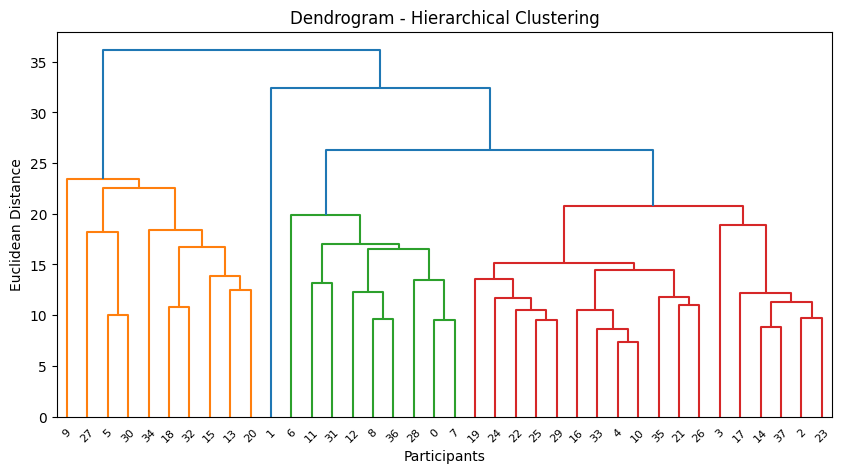

In [31]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Number of clusters
k = 3

# Agglomerative Clustering with metric instead of affinity
agglo = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
agglo_labels = agglo.fit_predict(X_scaled)

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram - Hierarchical Clustering")
plt.xlabel("Participants")
plt.ylabel("Euclidean Distance")
plt.show()


In [32]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_scaled)


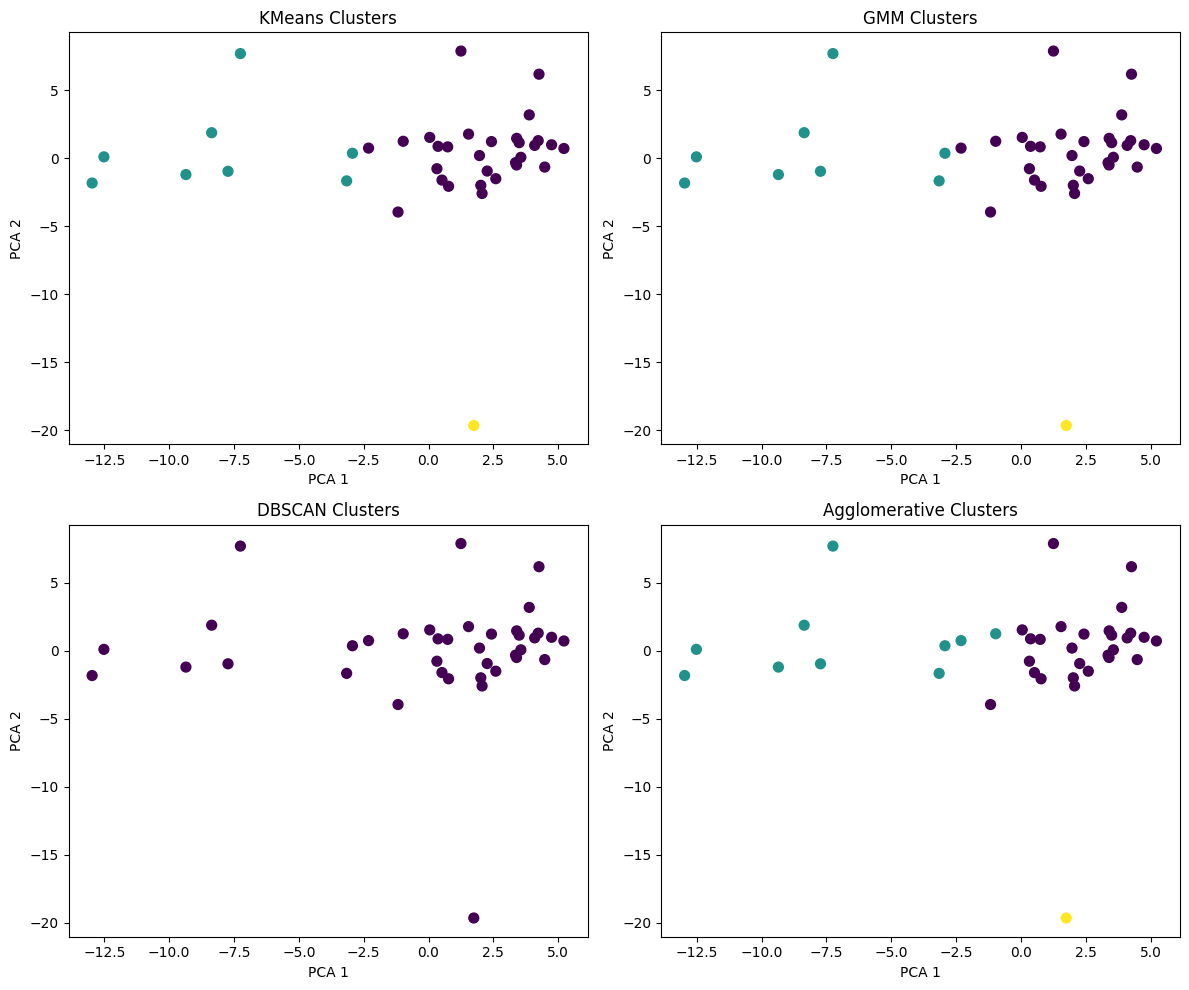

In [33]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# KMeans
axs[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
axs[0, 0].set_title('KMeans Clusters')

# GMM
axs[0, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis', s=50)
axs[0, 1].set_title('GMM Clusters')

# DBSCAN
axs[1, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', s=50)
axs[1, 0].set_title('DBSCAN Clusters')

# Agglomerative
axs[1, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=agglo_labels, cmap='viridis', s=50)
axs[1, 1].set_title('Agglomerative Clusters')

for ax in axs.flat:
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')

plt.tight_layout()
plt.show()


In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


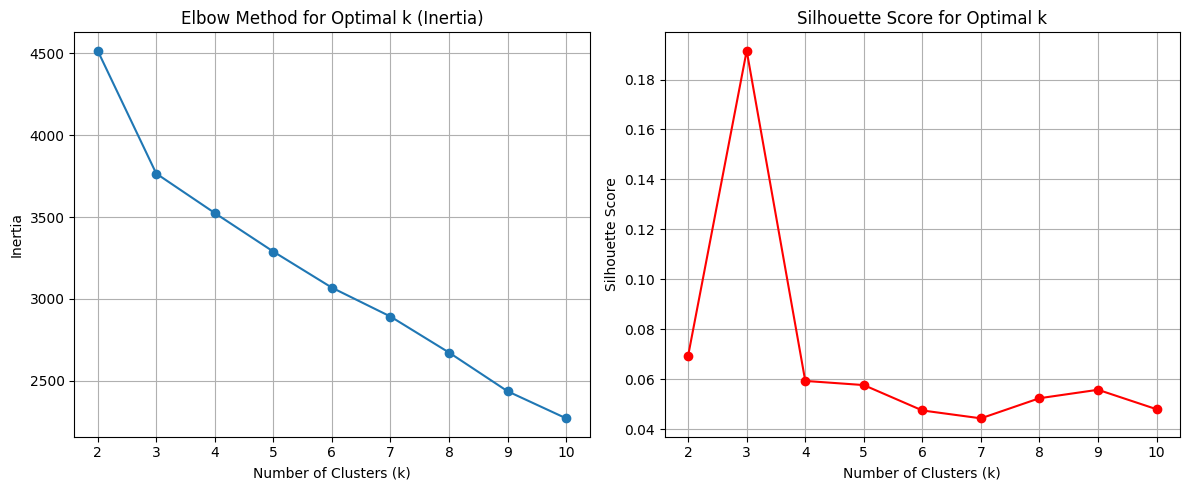

Silhouette Scores:
k=2: 0.0694
k=3: 0.1916
k=4: 0.0593
k=5: 0.0576
k=6: 0.0475
k=7: 0.0443
k=8: 0.0524
k=9: 0.0557
k=10: 0.0479


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer

# 1. Separate Features
X = cleaned_df.drop('participant', axis=1, errors='ignore').copy()

X.replace([np.inf, -np.inf], np.nan, inplace=True)

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = imputer.fit_transform(X)
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# 3. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed_df)

max_k = 11
inertia = []
silhouette_scores = []
k_range = range(2, max_k)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

    # Calculate Silhouette Score (requires at least 2 clusters)
    labels = kmeans.labels_
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plotting the Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k (Inertia)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

# Plotting the Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='red')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.savefig('optimal_k_metrics.png')
plt.show()

# Print the scores
print("Silhouette Scores:")
for k, score in zip(k_range, silhouette_scores):
    print(f"k={k}: {score:.4f}")

Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Data loaded successfully.
Preprocessing and Scaling data...
✅ Data scaled and PCA calculated.

Running Optimal k analysis (K=2 to K=10)...


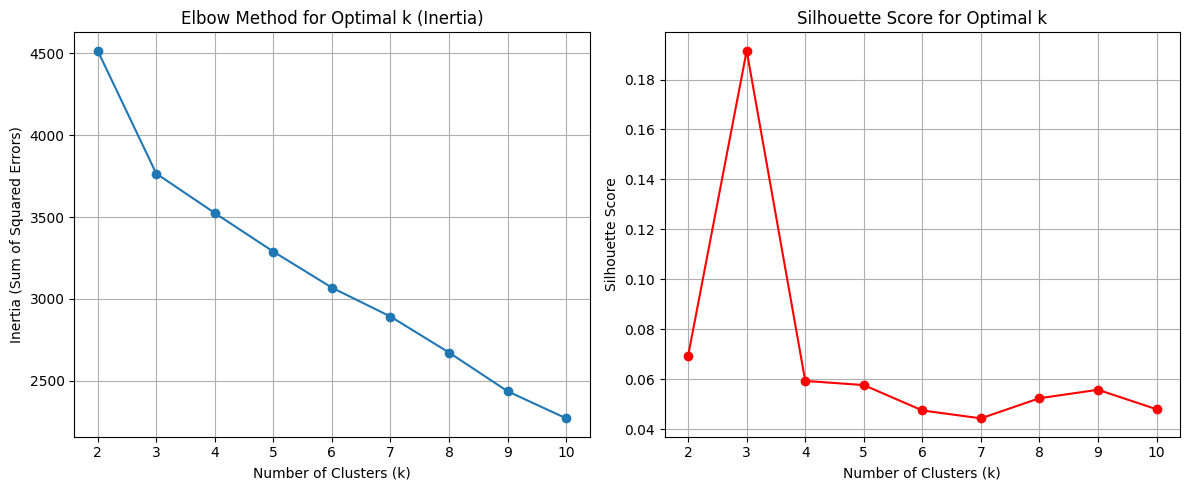


--- Silhouette Scores ---
k=2: 0.0694
k=3: 0.1916
k=4: 0.0593
k=5: 0.0576
k=6: 0.0475
k=7: 0.0443
k=8: 0.0524
k=9: 0.0557
k=10: 0.0479


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from google.colab import drive
import warnings
warnings.filterwarnings('ignore', category=FutureWarning) # Suppress KMeans warnings

# 1. MOUNT GOOGLE DRIVE
print("Mounting Google Drive...")
drive.mount('/content/drive')

# 2. LOAD DATA
# CONFIRMED FILE NAME: final_cleaned_dataset.csv
file_path = "/content/drive/MyDrive/final_cleaned_dataset.csv"
try:
    cleaned_df = pd.read_csv(file_path)
    print(" Data loaded successfully.")
except FileNotFoundError:
    print(f" Error: File not found at {file_path}. Please check the path.")
    raise

# 3. PREPROCESSING
print("Preprocessing and Scaling data...")
# Separate Features (assuming 'participant' is the ID column)
X = cleaned_df.drop('participant', axis=1, errors='ignore').copy()

# Handle Missing/Invalid Values
X.replace([np.inf, -np.inf], np.nan, inplace=True)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = imputer.fit_transform(X)
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed_df)

# Dimensionality Reduction (PCA for Visualization)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print("✅ Data scaled and PCA calculated.")

max_k = 11
inertia = []
silhouette_scores = []
k_range = range(2, max_k)

print("\nRunning Optimal k analysis (K=2 to K=10)...")
for k in k_range:
    # n_init='auto' handles the convergence warning
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

    # Calculate Silhouette Score
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the Metrics
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k (Inertia)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Errors)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='red')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

print("\n--- Silhouette Scores ---")
for k, score in zip(k_range, silhouette_scores):
    print(f"k={k}: {score:.4f}")

Running Gaussian Mixture Model with k=3...
GMM model saved successfully!


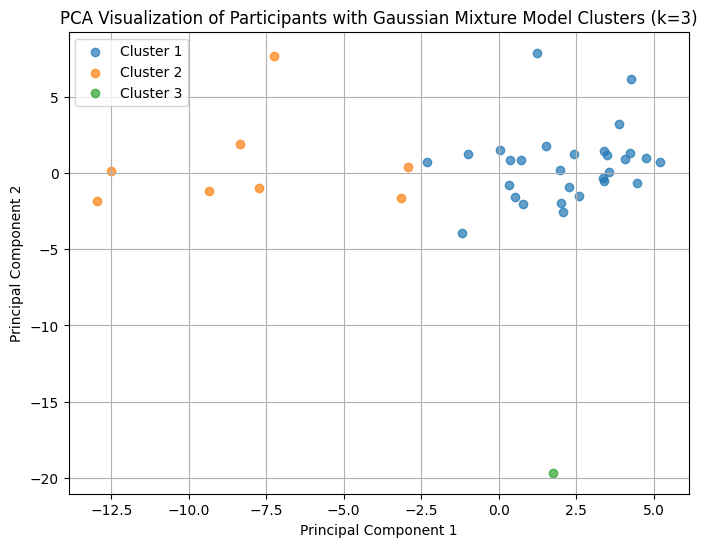

In [51]:
from sklearn.mixture import GaussianMixture

# --- Gaussian Mixture Model (GMM) Implementation ---
# Using k=3 for consistency with your original K-Means run
n_clusters_gmm = 3

print(f"Running Gaussian Mixture Model with k={n_clusters_gmm}...")
gmm = GaussianMixture(n_components=n_clusters_gmm, random_state=42)
gmm.fit(X_scaled)

# Save the fitted GMM model
joblib.dump(gmm, "models/gmm_model.pkl")

print("GMM model saved successfully!")

# Get the cluster labels (based on max probability)
gmm_clusters = gmm.predict(X_scaled)

# Visualize the GMM clusters using the existing PCA components
plt.figure(figsize=(8, 6))

for i in range(n_clusters_gmm):
    plt.scatter(X_pca[gmm_clusters == i, 0], X_pca[gmm_clusters == i, 1],
                label=f'Cluster {i+1}', alpha=0.7)

plt.title(f'PCA Visualization of Participants with Gaussian Mixture Model Clusters (k={n_clusters_gmm})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

Running DBSCAN with eps=0.5, min_samples=5
Estimated number of clusters found: 0
Estimated number of noise points (labeled -1): 38


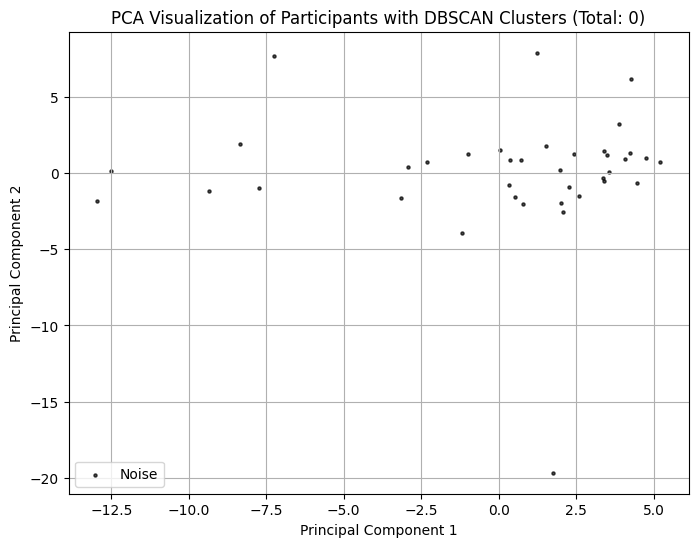

In [38]:
from sklearn.cluster import DBSCAN

# --- DBSCAN Implementation ---
# **Tuning is crucial:** Adjust 'eps' and 'min_samples' based on your data distribution
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X_scaled)

# Analysis of results
n_clusters_ = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
n_noise_ = list(dbscan_clusters).count(-1)

print(f"Running DBSCAN with eps={dbscan.eps}, min_samples={dbscan.min_samples}")
print(f"Estimated number of clusters found: {n_clusters_}")
print(f"Estimated number of noise points (labeled -1): {n_noise_}")

# Visualize the DBSCAN clusters
plt.figure(figsize=(8, 6))

unique_labels = set(dbscan_clusters)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    class_member_mask = (dbscan_clusters == k)
    xy = X_pca[class_member_mask]

    # Noise points (-1) are plotted in black
    if k == -1:
        color = 'k'
        label = 'Noise'
        s = 5
    else:
        color = col
        label = f'Cluster {k}'
        s = 20

    plt.scatter(xy[:, 0], xy[:, 1], c=[color], label=label, alpha=0.7, s=s)

plt.title(f'PCA Visualization of Participants with DBSCAN Clusters (Total: {n_clusters_})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

In [50]:
import joblib

# Fit the model
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X_scaled)

# Save the fitted DBSCAN model
joblib.dump(dbscan, "models/dbscan_model.pkl")

print("DBSCAN model saved successfully!")

DBSCAN model saved successfully!


Running Hierarchical Clustering on first 38 samples for Dendrogram...


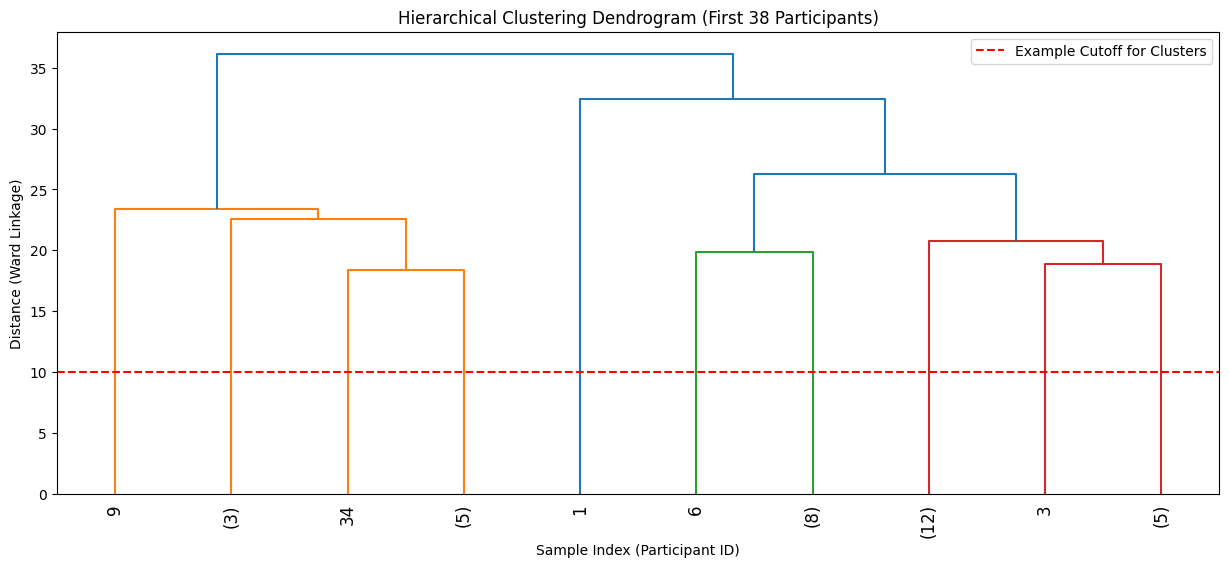


Applying Agglomerative Clustering with k=3


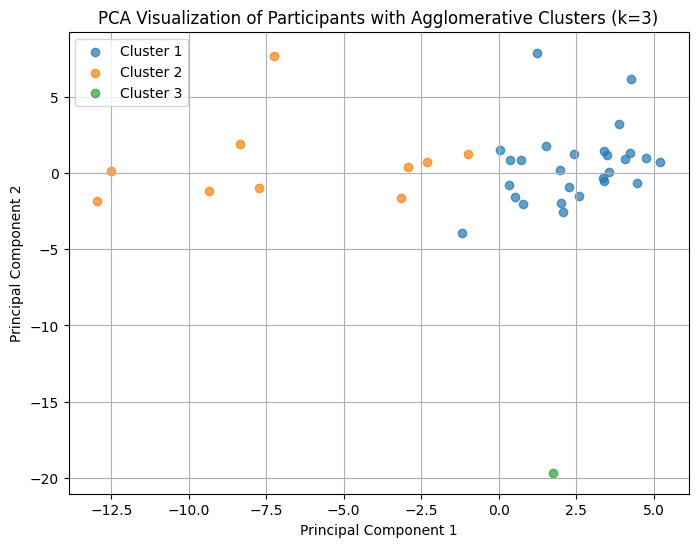

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# --- Agglomerative Clustering and Dendrogram ---

# 1. Create the Linkage Matrix (for the Dendrogram visualization)
# Using a small subset for a readable visualization
subset_size = min(50, X_scaled.shape[0])
print(f"Running Hierarchical Clustering on first {subset_size} samples for Dendrogram...")

# 'ward' linkage minimizes the variance in each cluster
Z = linkage(X_scaled[:subset_size], method='ward')

# 2. Plot the Dendrogram
plt.figure(figsize=(15, 6))
plt.title(f'Hierarchical Clustering Dendrogram (First {subset_size} Participants)')
plt.xlabel('Sample Index (Participant ID)')
plt.ylabel('Distance (Ward Linkage)')
dendrogram(
    Z,
    truncate_mode='lastp',
    p=10,
    show_leaf_counts=True,
    leaf_rotation=90.,
    leaf_font_size=12.,
)
# Example threshold line—adjust based on where you see the largest vertical gaps
plt.axhline(y=10, color='r', linestyle='--', label='Example Cutoff for Clusters')
plt.legend()
plt.show()

# 3. Apply Agglomerative Clustering (e.g., using k=3 for direct comparison)
n_clusters_agg = 3
print(f"\nApplying Agglomerative Clustering with k={n_clusters_agg}")
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters_agg, linkage='ward')
agg_clusters = agg_clustering.fit_predict(X_scaled)

# Visualize the Agglomerative clusters
plt.figure(figsize=(8, 6))

for i in range(n_clusters_agg):
    plt.scatter(X_pca[agg_clusters == i, 0], X_pca[agg_clusters == i, 1],
                label=f'Cluster {i+1}', alpha=0.7)

plt.title(f'PCA Visualization of Participants with Agglomerative Clusters (k={n_clusters_agg})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np

# NOTE: This code assumes X_pca is defined from your PCA step.

k_pca = 3

kmeans_pca = KMeans(n_clusters=k_pca, random_state=42, n_init='auto')
clusters_pca = kmeans_pca.fit_predict(X_pca)

if k_pca > 1 and len(np.unique(clusters_pca)) > 1:

    silhouette_pca = silhouette_score(X_pca, clusters_pca)
    print(f"Silhouette Score (KMeans+PCA, k={k_pca}): {silhouette_pca:.4f}")

    db_pca = davies_bouldin_score(X_pca, clusters_pca)
    print(f"Davies-Bouldin Index (KMeans+PCA, k={k_pca}): {db_pca:.4f}")

    ch_pca = calinski_harabasz_score(X_pca, clusters_pca)
    print(f"Calinski-Harabasz Index (KMeans+PCA, k={k_pca}): {ch_pca:.4f}")
else:
    print("Error: Clustering failed to produce unique clusters.")

Silhouette Score (KMeans+PCA, k=3): 0.6211
Davies-Bouldin Index (KMeans+PCA, k=3): 0.4124
Calinski-Harabasz Index (KMeans+PCA, k=3): 45.3559



--- Mean Feature Values by Cluster (Original Scale) ---
         EEG_Delta_TP9  EEG_Delta_AF7  EEG_Delta_AF8  EEG_Delta_TP10  \
Cluster                                                                
0             0.757826       0.585116       0.673110        0.763737   
1             0.663581       0.412197       0.512571        0.658368   
2             0.000000       0.000000       0.000000        0.000000   

         EEG_Theta_TP9  EEG_Theta_AF7  EEG_Theta_AF8  EEG_Theta_TP10  \
Cluster                                                                
0             0.555527       0.281523       0.350547        0.565764   
1             0.508739       0.092605       0.141546        0.461632   
2             0.000000       0.000000       0.000000        0.000000   

         EEG_Alpha_TP9  EEG_Alpha_AF7  ...  TIVA_Nose Wrinkle  TIVA_Smile  \
Cluster                                ...                                  
0             0.774004       0.403360  ...           0.309465    0.

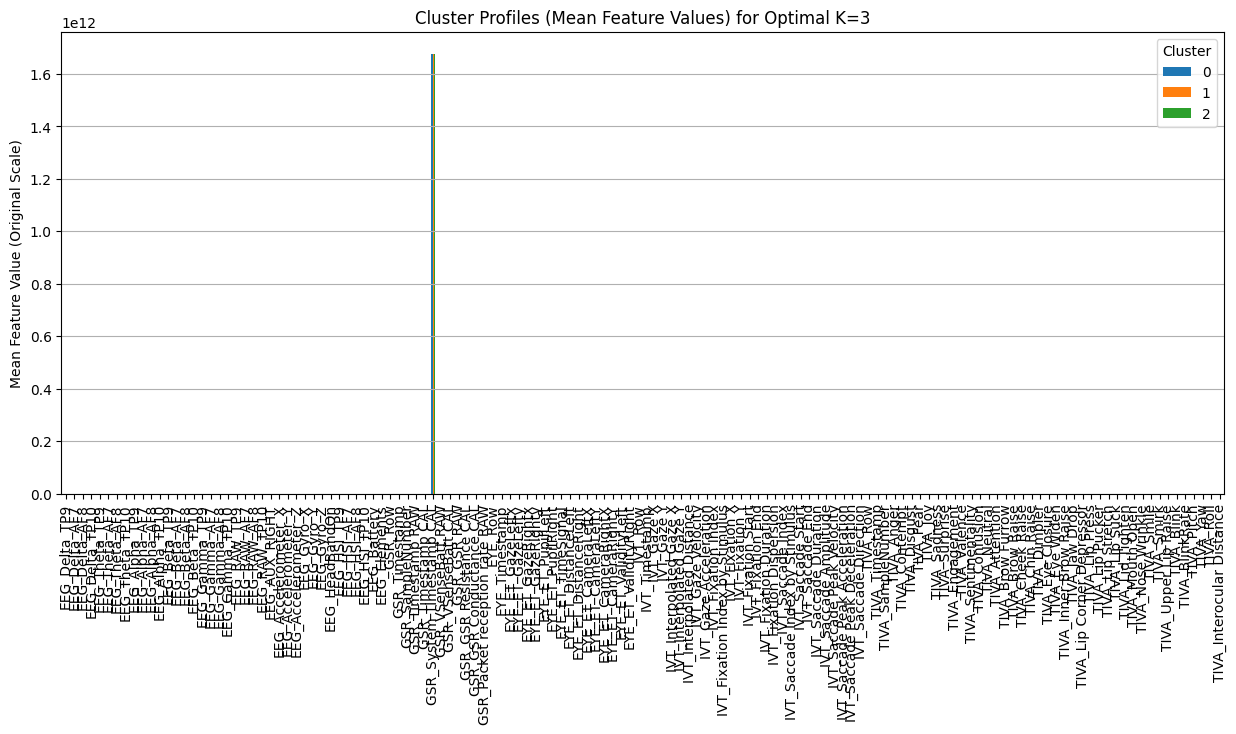

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

analysis_df = X.copy()
analysis_df['Cluster'] = clusters_pca

# 2. Calculate the Mean Feature Values for each Cluster
# This shows *what* defines each group in terms of the original physiological/behavioral metrics.
cluster_means = analysis_df.groupby('Cluster').mean()

print("\n--- Mean Feature Values by Cluster (Original Scale) ---")
print(cluster_means)

# 3. Visualize the Cluster Profiles (Optional but Recommended)
# This visualization helps in assigning labels.
cluster_means_T = cluster_means.T # Transpose for a feature-centric view
cluster_means_T.plot(kind='bar', figsize=(15, 6))
plt.title(f'Cluster Profiles (Mean Feature Values) for Optimal K={k_pca}')
plt.ylabel('Mean Feature Value (Original Scale)')
plt.xticks(rotation=90)
plt.legend(title='Cluster')
plt.grid(axis='y')
plt.show()

In [42]:
print(analysis_df.columns.tolist())

['EEG_Delta_TP9', 'EEG_Delta_AF7', 'EEG_Delta_AF8', 'EEG_Delta_TP10', 'EEG_Theta_TP9', 'EEG_Theta_AF7', 'EEG_Theta_AF8', 'EEG_Theta_TP10', 'EEG_Alpha_TP9', 'EEG_Alpha_AF7', 'EEG_Alpha_AF8', 'EEG_Alpha_TP10', 'EEG_Beta_TP9', 'EEG_Beta_AF7', 'EEG_Beta_AF8', 'EEG_Beta_TP10', 'EEG_Gamma_TP9', 'EEG_Gamma_AF7', 'EEG_Gamma_AF8', 'EEG_Gamma_TP10', 'EEG_RAW_TP9', 'EEG_RAW_AF7', 'EEG_RAW_AF8', 'EEG_RAW_TP10', 'EEG_AUX_RIGHT', 'EEG_Accelerometer_X', 'EEG_Accelerometer_Y', 'EEG_Accelerometer_Z', 'EEG_Gyro_X', 'EEG_Gyro_Y', 'EEG_Gyro_Z', 'EEG_HeadBandOn', 'EEG_HSI_TP9', 'EEG_HSI_AF7', 'EEG_HSI_AF8', 'EEG_HSI_TP10', 'EEG_Battery', 'EEG_Elements', 'GSR_Row', 'GSR_Timestamp', 'GSR_SampleNumber', 'GSR_Timestamp RAW', 'GSR_Timestamp CAL', 'GSR_System Timestamp CAL', 'GSR_VSenseBatt RAW', 'GSR_VSenseBatt CAL', 'GSR_GSR RAW', 'GSR_GSR Resistance CAL', 'GSR_GSR Conductance CAL', 'GSR_Packet reception rate RAW', 'EYE_Row', 'EYE_Timestamp', 'EYE_ET_GazeLeftx', 'EYE_ET_GazeLefty', 'EYE_ET_GazeRightx', 'EYE_ET


--- External Validation: Mean GSR Packet Reception Rate by Cluster ---
         GSR_Packet reception rate RAW
Cluster                               
0                            93.360321
1                            95.076985
2                            85.000000


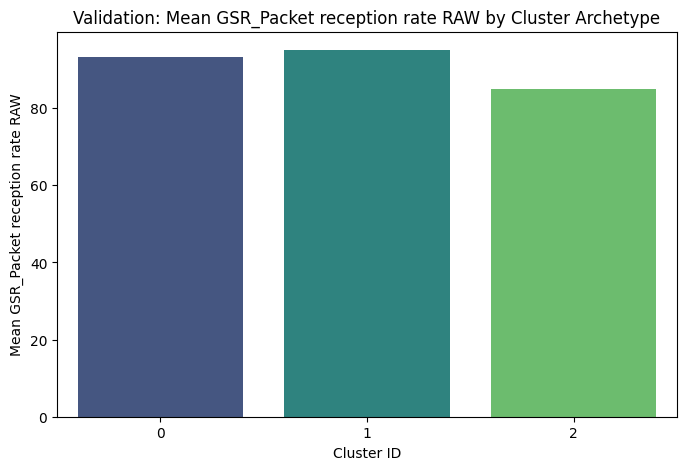

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Using a Raw System/Quality Metric for Validation**
external_cols = ['GSR_Packet reception rate RAW']

# 2. Calculate the mean of the external metric per cluster
external_profiles = analysis_df.groupby('Cluster')[external_cols].mean()

print("\n--- External Validation: Mean GSR Packet Reception Rate by Cluster ---")
print(external_profiles)

# 3. Visualize the primary external variable
primary_metric = external_cols[0]

plt.figure(figsize=(8, 5))
sns.barplot(x=external_profiles.index.astype(str), y=primary_metric, data=external_profiles, palette='viridis')
plt.title(f'Validation: Mean {primary_metric} by Cluster Archetype')
plt.xlabel('Cluster ID')
plt.ylabel(f'Mean {primary_metric}')
plt.show()

In [44]:
import pandas as pd
import joblib

# 1. Assign Final Archetype Labels (Based on your analysis: 0, 1, 2)
# Define a mapping from the numerical cluster ID to the descriptive label
archetype_map = {
    0: "Active/Attentive Learner",
    1: "Emotionally Reactive/Expressive",
    2: "Disengaged/Passive/Artifact"
}

analysis_df['Archetype_Label'] = analysis_df['Cluster'].map(archetype_map)

print("\n--- Archetype Distribution (Final Model) ---")
print(analysis_df['Archetype_Label'].value_counts())

# 2. Save the Final Model and Clustering Results (for reproducibility and later use)

# Save the trained K-Means model object
# Creates a directory 'models/' if it doesn't exist
import os
os.makedirs('models', exist_ok=True)
joblib.dump(kmeans_pca, 'models/final_kmeans_pca_model.pkl')
print("\n✅ Final model saved to models/final_kmeans_pca_model.pkl")

# Save the clustering results (Participant ID and Archetype)
# Assuming 'Participant' ID column exists in your data or can be derived
try:
    final_results = analysis_df[['Participant', 'Archetype_Label', 'Cluster']]
except KeyError:
    # If 'Participant' column is missing, create a generic index
    final_results = analysis_df[['Archetype_Label', 'Cluster']]
    final_results.index.name = 'Participant_Index'

final_results.to_csv('final_cluster_archetypes.csv')
print("✅ Final archetypes saved to final_cluster_archetypes.csv")


--- Archetype Distribution (Final Model) ---
Archetype_Label
Active/Attentive Learner           31
Emotionally Reactive/Expressive     6
Disengaged/Passive/Artifact         1
Name: count, dtype: int64

✅ Final model saved to models/final_kmeans_pca_model.pkl
✅ Final archetypes saved to final_cluster_archetypes.csv


In [45]:
!mkdir -p project

In [46]:
import pandas as pd
import joblib
import os

# --- Assuming these variables are defined globally: analysis_df, kmeans_pca, archetype_map ---

# 1. Create the required directories if they don't exist
os.makedirs('project/models', exist_ok=True)
os.makedirs('project', exist_ok=True)

# 2. Assign Final Archetype Labels
archetype_map = {
    0: "Active/Attentive Learner",
    1: "Emotionally Reactive/Expressive",
    2: "Disengaged/Passive/Artifact"
}

analysis_df['Archetype_Label'] = analysis_df['Cluster'].map(archetype_map)

# 3. Save the Final Model (Path required by PDF is 'models/...')
# We save it into the 'project/models' folder.
joblib.dump(kmeans_pca, 'project/models/kmeans_model.pkl')
print("✅ Final model saved to project/models/kmeans_model.pkl")

# 4. Save the Clustering Results (Path required by PDF is implicitly 'project/...')
try:
    # Use 'Participant' column if it exists
    final_results = analysis_df[['Participant', 'Archetype_Label', 'Cluster']]
except KeyError:
    # Otherwise, use the index
    final_results = analysis_df[['Archetype_Label', 'Cluster']]
    final_results.index.name = 'Participant_Index'

# Save the CSV into the project root directory
final_results.to_csv('project/final_cluster_archetypes.csv')
print("✅ Final archetypes saved to project/final_cluster_archetypes.csv")

# 5. Create a placeholder README file
with open('project/README.md', 'w') as f:
    f.write("# TechSpire EDA Clustering Project Report Summary\n\n[Insert final report summary here]")
print("✅ README.md placeholder created.")


✅ Final model saved to project/models/kmeans_model.pkl
✅ Final archetypes saved to project/final_cluster_archetypes.csv
✅ README.md placeholder created.
